In [1]:
# TODO LIST
# Kernel & Convolution Theory
# Convolutions in action
#   * Blur
#   * Sobel
# Thresholding
# Drawing
# Contour detection

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import glob
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

image_path = "data/catdog.png"

<IPython.core.display.Javascript object>

In [4]:
def imshow_cv2plt(bgr_img, title="", axes_off=True):
    rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.title(title)
    if axes_off:
        plt.axis("off")
    plt.show()


def resize(img, width=None, height=None):
    h, w = img.shape[:2]

    if width is not None and height is not None:
        pass
    elif width is not None:
        height = width * (h / w)
    elif height is not None:
        width = height * (w / h)
    else:
        raise ValueError("No dimensions provided")

    resized = cv2.resize(img, (round(width), round(height)))
    return resized

<IPython.core.display.Javascript object>

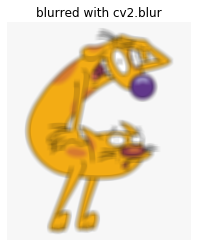

<IPython.core.display.Javascript object>

In [5]:
image = cv2.imread(image_path)
# image = resize(image, width=50)
blurred = cv2.blur(image, (30, 30))
imshow_cv2plt(blurred, "blurred with cv2.blur")

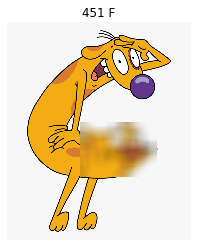

<IPython.core.display.Javascript object>

In [6]:
image = cv2.imread(image_path)
image[500:775, 365:750] = cv2.blur(image[500:775, 365:750], (70, 70))
imshow_cv2plt(image, "451 F")

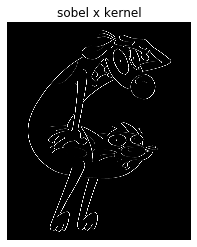

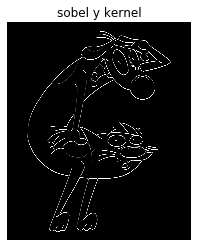

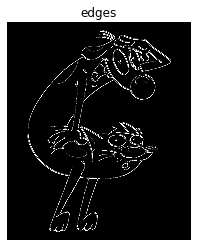

<IPython.core.display.Javascript object>

In [7]:
# fmt: off
sobel_x = np.array([[-1, 0, 1], 
                    [-2, 0, 2], 
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                    [ 0,  0,  0], 
                    [ 1,  2,  1]])
# fmt: on

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
x_edges = cv2.filter2D(gray, -1, sobel_x)

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
y_edges = cv2.filter2D(gray, -1, sobel_y)

imshow_cv2plt(x_edges, "sobel x kernel")
imshow_cv2plt(y_edges, "sobel y kernel")

edges = x_edges + y_edges
imshow_cv2plt(edges, "edges")

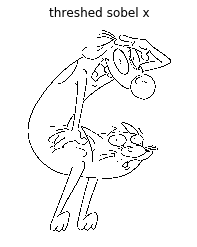

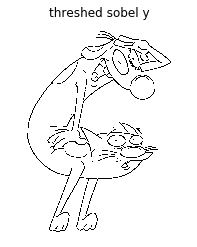

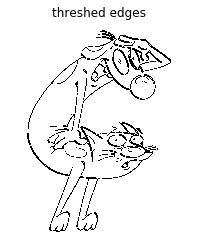

<IPython.core.display.Javascript object>

In [8]:
_, threshed_x_edges = cv2.threshold(x_edges, 10, 255, cv2.THRESH_BINARY_INV)
imshow_cv2plt(threshed_x_edges, "threshed sobel x")

_, threshed_y_edges = cv2.threshold(y_edges, 10, 255, cv2.THRESH_BINARY_INV)
imshow_cv2plt(threshed_y_edges, "threshed sobel y")

_, threshed_edges = cv2.threshold(edges, 10, 255, cv2.THRESH_BINARY_INV)
imshow_cv2plt(threshed_edges, "threshed edges")

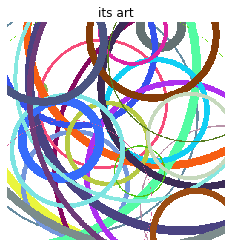

<IPython.core.display.Javascript object>

In [9]:
import random

# other drawing functions:
# https://docs.opencv.org/2.4/modules/core/doc/drawing_functions.html

w = 512
canvas = 255 * np.ones((w, w, 3), dtype="uint8")
n_circles = 30

# generate 'art'
for i in range(n_circles):
    # pick a random point
    x = random.randint(0, w)
    y = random.randint(0, w)

    # pick a random color
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)

    # pick a random radius and thickness
    radius = random.randint(10, 500)
    thickness = random.randint(0, 20)

    cv2.circle(canvas, (x, y), radius, (b, g, r), thickness)


imshow_cv2plt(canvas, "its art")

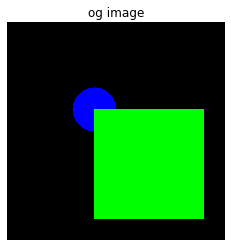

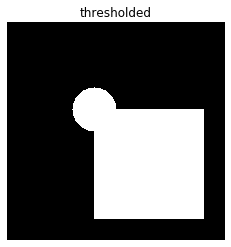

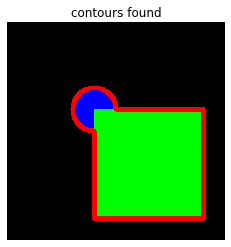

<IPython.core.display.Javascript object>

In [10]:
canvas = np.zeros((500, 500, 3), dtype="uint8")

cv2.circle(canvas, (200, 200), 50, (255, 0, 0), -1)
cv2.rectangle(canvas, (200, 200), (450, 450), (0, 255, 0), -1)
imshow_cv2plt(canvas, "og image")

gray = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
_, threshed = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
plt.imshow(threshed, cmap="gray")
plt.axis("off")
plt.title("thresholded")
plt.show()

# More on contour finding:
# http://www.imageprocessingplace.com/downloads_V3/root_downloads/tutorials/contour_tracing_Abeer_George_Ghuneim/moore.html
contours, _ = cv2.findContours(threshed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(canvas, contours, -1, (0, 0, 255), 10)
imshow_cv2plt(canvas, "contours found")

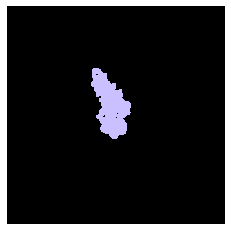

<IPython.core.display.Javascript object>

In [11]:
# canvas dims
w = 500
h = 500

# center point
cx = w // 2
cy = h // 2

canvas = np.zeros((w, h, 3), dtype="uint8")

n_steps = 1000
x = cx
y = cy

radius = 5
for _ in range(n_steps):
    x += random.randint(-radius, radius)
    y += random.randint(-radius, radius)

    cv2.circle(canvas, (x, y), radius, (255, 192, 203), -1)

    # If you want to pop open another window to watch it
    cv2.imshow("Animation", canvas)
    key = cv2.waitKey(5)

    if key == 27:
        break


cv2.destroyAllWindows()
imshow_cv2plt(canvas)